In [1]:
import torch
from torch import nn
from data import get_batches

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
def train(model, loss_fn, optim):
    model.train()
    Loss = []
    for input, output in get_batches():
        out = model(input)

        loss = loss_fn(out, output)
        Loss.append(loss.item())

        model.zero_grad()
        loss.backward()
        optim.step()
    return sum(Loss) / len(Loss)


def test(model, loss_fn):
    model.eval()
    Loss = []
    for input, output in get_batches(test=True):
        out = model(input)

        loss = loss_fn(out, output)
        Loss.append(loss.item())
    return sum(Loss) / len(Loss)

In [16]:
model = nn.Sequential(
    nn.Linear(832, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.Sigmoid()
).to(device)

loss_fn = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), 3e-4)

In [17]:
best = 1

In [18]:
last_save = 0
epoch = 0
train_loss = []
test_loss = []
remaining = 1

while remaining:
    epoch += 1
    print(f'Epoch {epoch}...')

    loss = train(model, loss_fn, optim)
    train_loss.append(loss)
    print(f'Train loss: {loss}')

    loss = test(model, loss_fn)
    test_loss.append(loss)
    print(f'Test loss: {loss}')

    remaining -= 1

    if loss < best:
        remaining += 2
        torch.save(model, '../model.pt')
        best = loss
        last_save = epoch
        print('Model saved')
    print()
torch.save(model, '../model.pt')
print(f'Last save on {last_save} epoch')

Epoch 1...
Train loss: 0.03616051320401821
Test loss: 0.030043805682450343
Model saved

Epoch 2...
Train loss: 0.029538075881565262
Test loss: 0.029369501835980992
Model saved

Epoch 3...
Train loss: 0.029216403945402546
Test loss: 0.02902419606496574
Model saved

Epoch 4...
Train loss: 0.02879787475511337
Test loss: 0.0287270182447069
Model saved

Epoch 5...
Train loss: 0.028392682750679694
Test loss: 0.02839420438050085
Model saved

Epoch 6...
Train loss: 0.02801175005615327
Test loss: 0.02828026309039942
Model saved

Epoch 7...
Train loss: 0.02769221316809487
Test loss: 0.028071362465904776
Model saved

Epoch 8...
Train loss: 0.027365638346523995
Test loss: 0.028001239072460278
Model saved

Epoch 9...
Train loss: 0.027029879145015766
Test loss: 0.027956221917062807
Model saved

Epoch 10...
Train loss: 0.02668379304135681
Test loss: 0.027861400726874163
Model saved

Epoch 11...
Train loss: 0.026318680527649678
Test loss: 0.027790849980939725
Model saved

Epoch 12...
Train loss: 0.025

In [19]:
model = torch.load('../model.pt')
print(test(model, loss_fn))

0.02954361575898851


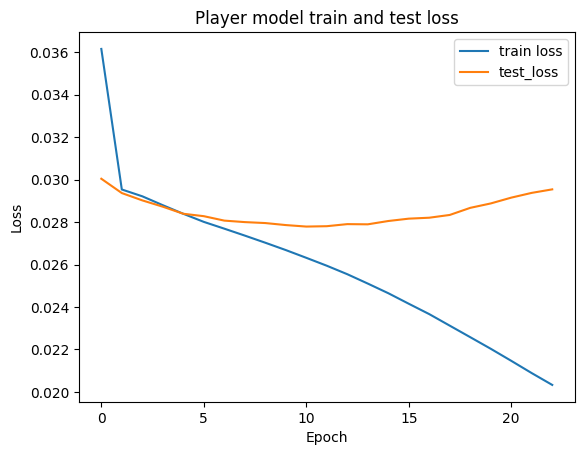

In [20]:
from matplotlib import pyplot as plt

plt.title('Player model train and test loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test_loss')
plt.legend()
plt.show()